In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datacompy
import os, sys
import numpy as np

# narzedzia
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_val_predict,
    learning_curve,
    RepeatedStratifiedKFold,
    GridSearchCV
)
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree


# modele
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#methods
from imblearn.under_sampling import (
    NearMiss,
    ClusterCentroids
)
from scipy.optimize import differential_evolution
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# w petli bedzie wykonywala sie np decision tree, ale kazda iteracja bedzie usunieciem danego wiersza i sprawdzeniem jak to wplywa na wynik

### DATA


In [3]:
original_data = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\original_data.csv")
smote_data = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\smote_data.csv")
GAN_data = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\GAN_data.csv")
borderline_data = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\borderlinesmote_data.csv")

# test data
X_test = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\Test\\X_test.csv")
y_test = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\Test\\y_test.csv")

In [43]:
#sum synthetic data
sum_syn_data = pd.concat([smote_data, borderline_data], axis=0)
sum_syn_data = pd.concat([sum_syn_data, GAN_data], axis=0)
sum_syn_data = sum_syn_data.reset_index(drop=True)

# sum all data
sum_data = pd.concat([original_data, sum_syn_data], axis=0)
sum_data = sum_data.reset_index(drop=True)
sum_data = sum_data.drop(columns=["Unnamed: 0"])

#X and y 
X_train = sum_data.drop(columns=['target', "source"])
y_train = sum_data['target']

In [46]:
con = original_data['target'].value_counts()
print("Przed", con)
print(original_data.shape)
print(sum_syn_data.shape)

print(sum_data.shape)

print(X_train.head())

Przed target
0    163
1     53
Name: count, dtype: int64
(216, 13)
(330, 12)
(546, 12)
   is_private  is_failure  is_root  is_valid  not_valid_count  ip_failure  \
0           1           1        0         1                0           4   
1           1           0        0         1                0           0   
2           1           1        1         1                0           4   
3           1           1        0         1                0           3   
4           1           1        0         1                0           1   

   ip_success  no_failure  first   td  
0          14           6      0    4  
1           1           0      0   23  
2           2           6      0  623  
3           0           2      0    7  
4           1           2      0   58  


### ClusterCentroids

In [55]:
cluscentr = ClusterCentroids(voting="auto", sampling_strategy="majority", random_state=42)

X_res, y_res = cluscentr.fit_resample(X_train, y_train)
print(y_res.value_counts())

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


target
0    163
1    163
Name: count, dtype: int64


### Differential_evolution => Himmelblau fun

is_private


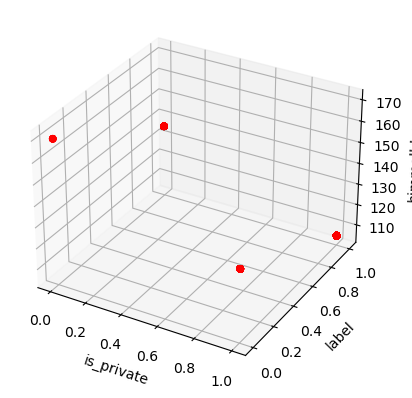

RuntimeError: The map-like callable must be of the form f(func, iterable), returning a sequence of numbers the same length as 'iterable'

In [54]:
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

features_list = X_train.columns.to_list()

for column in features_list:
    print(column)
    out_himmelblau = himmelblau(X_train[column], y_train)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train[column], y_train, out_himmelblau, c='r', marker='o')
    ax.set_xlabel(column)
    ax.set_ylabel('label')
    ax.set_zlabel('himmelblau')
    plt.show()
    
    bounds_cal = [(X_train[column].min(), X_train[column].max())]
    
    result = differential_evolution(func=himmelblau, bounds=bounds_cal, args=(y_train))
    
    print('Optymalne wartości zmiennych:', result.x)
    print('Minimalna wartość funkcji:', result.fun)


### KMeans

In [ ]:
Kmeans = KMeans(n_clusters=8, init="k-means++", n_init="auto", random_state=42)


